# Практическая работа
## Линейная регрессия: Анализ Погоды
### Воложанин Владислав, Мельникова Алена, Сумарокова Катерина.

### Импорт библиотек

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings("ignore")
from dateutil.parser import parse
import seaborn as sns
import statsmodels.formula.api as sm

### Загрузка и изучение данных

In [2]:
df = pd.read_csv('weatherHistory.csv')

In [3]:
df.head(-4)
df.columns
df.shape
df.info()

df[['Humidity','Temperature (C)','Apparent Temperature (C)']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


,Humidity,Temperature (C),Apparent Temperature (C)
count,96453.000000,96453.000000,96453.000000
mean,0.734899,11.932678,10.855029
std,0.195473,9.551546,10.696847
min,0.000000,-21.822222,-27.716667
25%,0.600000,4.688889,2.311111
50%,0.780000,12.000000,12.000000
75%,0.890000,18.838889,18.838889
max,1.000000,39.905556,39.344444


### Визуализация и регрессия 1
### - статистическая значимость независимой переменной (Значимая)

                              OLS Regression Results                             
Dep. Variable:     df["Temperature (C)"]   R-squared:                       0.400
Model:                               OLS   Adj. R-squared:                  0.400
Method:                    Least Squares   F-statistic:                 6.423e+04
Date:                   Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                           01:39:38   Log-Likelihood:            -3.2991e+05
No. Observations:                  96453   AIC:                         6.598e+05
Df Residuals:                      96451   BIC:                         6.598e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept     

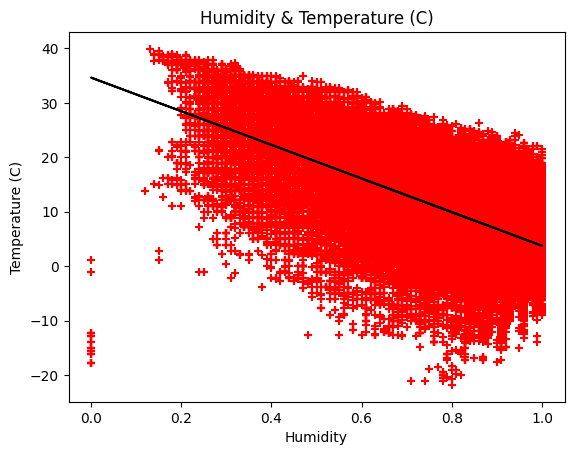

In [4]:
plt.scatter(df["Humidity"],df["Temperature (C)"],color='r',marker='+')
plt.title('Humidity & Temperature (C)')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')
plt.grid(False)

mod=sm.ols(formula='df["Temperature (C)"]~df["Humidity"]',data=df)
res=mod.fit()
print(res.summary())

plt.scatter(df["Humidity"],df["Temperature (C)"],color='r',marker='+')
plt.plot(df["Humidity"], 34.6369-30.8944*df["Humidity"],color='black')
plt.title('Humidity & Temperature (C)')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')
plt.grid(False)

### Визуализация и регрессия 2 
### - Статистическая значимость независимой переменной (Значимая)

                            OLS Regression Results                            
Dep. Variable:         df["Humidity"]   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                 6.423e+04
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        01:39:39   Log-Likelihood:                 45198.
No. Observations:               96453   AIC:                        -9.039e+04
Df Residuals:                   96451   BIC:                        -9.037e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.88

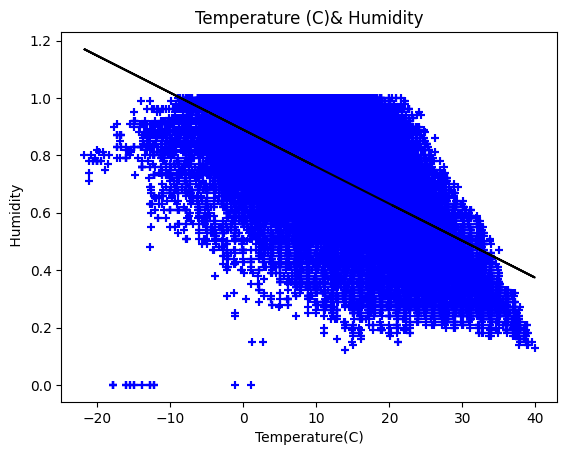

In [5]:
plt.scatter(df["Temperature (C)"],df["Humidity"],color='b',marker='+')
plt.title('Temperature (C)& Humidity')
plt.xlabel('Temperature(C)')
plt.ylabel(' Humidity')
plt.grid(False)

mod=sm.ols(formula='df["Humidity"]~df["Temperature (C)"]',data=df)
res=mod.fit()
print(res.summary())

plt.scatter(df["Temperature (C)"],df["Humidity"],color='b',marker='+')
plt.plot(df["Temperature (C)"], 0.8893-0.0129*df["Temperature (C)"],color='black')
plt.title('Temperature (C)& Humidity')
plt.xlabel('Temperature(C)')
plt.ylabel(' Humidity')
plt.grid(False)

Первая модель оценивает влияние влажности на температуру. Исходя из значений, квадратичное значение R для модели равно 0,3997, это указывает на то, что в среднем 39-процентные колебания температуры в умеренном климате могут быть объяснены средним изменением влажности. Значение β1, равное -30,8944, показывает отрицательную зависимость между влажностью и температурой, т.е. температура отрицательно реагирует на изменение влажности, если влажность увеличивается или уменьшается на одну единицу, температура уменьшается или увеличивается на 30,8944 единицы.Значение параметра перехвата β0 равно 34,6369, что означает, что если влажность воздуха равна нулю, то температура будет составлять приблизительно 34,6 единицы. Так как значение p меньше 0,05, коэффициент регрессии является статистически значимым, т.е. влажность влияет на температуру.